**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Reading data from dataworld
df = pd.read_csv('https://query.data.world/s/tv67gs7znqpnd3qiticgfwthxwu4iy?dws=00000')

In [3]:

df.shape

(16719, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
set(df['Year_of_Release'].values)

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

##**Data Cleaning / Feature Engineering**

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
#Dropping all null values in dataframe in all columns
df = df.dropna()

In [ ]:
df.shape

(6825, 16)

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
#lowercase the column names
df.columns=df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [ ]:
type(df['user_score'].values[0])

str

In [ ]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score          object
user_count         float64
developer           object
rating              object
dtype: object

In [ ]:
#converting the year_of_release of float type  into integer type
df['year_of_release']=df['year_of_release'].astype(int)
#converting user_score column of object type into float type
df['user_score']=df['user_score'].astype(float)

In [ ]:
object_type_cols = df.select_dtypes(include=['object']).columns
for i in object_type_cols:
  df[i]=df[i].str.lower()

In [ ]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,wii sports,wii,2006,sports,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,nintendo,e
2,mario kart wii,wii,2008,racing,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,nintendo,e
3,wii sports resort,wii,2009,sports,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,nintendo,e
6,new super mario bros.,ds,2006,platform,nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,nintendo,e
7,wii play,wii,2006,misc,nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,nintendo,e


In [ ]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


**year_of_release:** The games in the dataset were released between 1983 and 2012. The median release year is 2005, suggesting that the data is more concentrated around the mid-2000s.

**Regional Sales (North America, Europe, Japan, Rest of World):**

**North America (na_sales):** The average sales are approximately 0.39 million units, with a maximum of 41.36 million units, indicating a significant market share in this region.

**Europe (eu_sales):** The average sales are around 0.23 million units. Europe's sales figures are generally lower than North America's, but it's still a significant market.

**Japan:** The average sales are lowest (about 0.06 million units), reflecting the smaller size or different preferences of the Japanese market.

**Rest of World:** This category has the lower average sales (about 0.08 million units), which could be due to the combination of various smaller markets.

**Global Sales:** The global sales average around 0.77 million units, with a maximum of 82.5 million units. This high maximum value indicates a few extremely successful titles.

**Review Scores:** The average review score is approximately 70 out of 100, with the 50th percentile (median) around 72. This suggests that most games in the dataset are fairly well-received, with scores leaning towards the higher end.

**Standard Deviation:** There is significant variability in sales figures across different regions and globally, as indicated by the standard deviations. This suggests a wide disparity in how well different games perform in sales.

**In order to avoid double dipping we are splitting our dataset into train and test sets. That implies 70% of dataset into train and 30% of data into test.**

**We use 70% of data for EDA and then we assume a hypothesis for train dataset and we prove that hypotheis on test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)

In [ ]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [ ]:
df_train=df_train.drop('index',axis=1)
df_test=df_test.drop('index',axis=1)

In [ ]:
df_train.shape

(4777, 16)

In [ ]:
df_test.shape

(2048, 16)

### **Factors Affecting Global Video Game Sales**

<ipython-input-21-7eec620d00f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_train.corr()


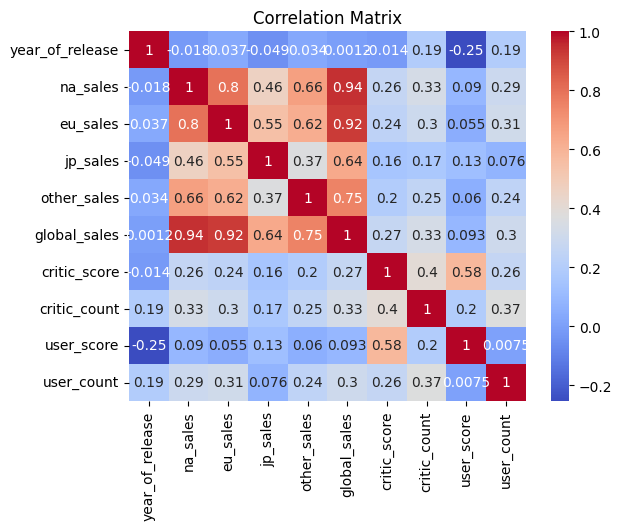

In [ ]:
#Factors Affecting Global Video Game Sales
correlations = df_train.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insights:**

**Sales Variables:** There's a very high positive correlation between sales in different regions (North America, Europe, Japan, Other) and global sales, as expected. The strongest correlation is between North American sales and global sales (0.95), which suggests that North American sales are a very strong indicator of global sales performance.

**Regional Sales Correlations:** Sales in North America and Europe show a very high correlation (0.8), indicating that trends in these two regions may be similar. Similarly, there is a moderately strong correlation between sales in Japan and other regions, albeit not as strong as between North America and Europe.

**Sales and Review Scores:** The correlation between global sales and critic scores (0.27) is positive but not very strong, which may suggest that higher critic scores can somewhat predict better sales, but there are likely other factors at play. The correlation between user scores and sales is even lower, suggesting that user scores are a less reliable predictor of sales.

**Year of Release:** The correlations between the year of release and sales are very weak, indicating that the release year is not a strong predictor of sales performance. This is interesting because one might expect newer games to have higher sales due to increased market size or inflation effects.

**Critic and User Scores:** There is a moderate positive correlation between critic scores and critic counts (0.39) as well as between user scores and user counts (0.2), which could indicate that games with more reviews tend to have higher scores, or that games that are reviewed more frequently are generally better received.

**Critic Scores vs. User Scores:** There is a moderate positive correlation between critic scores and user scores (0.59), suggesting that critics and users often agree on the quality of a game, but there are certainly cases where they do not.

**Critic Count vs. User Count:** There is a very low correlation between the number of critic reviews and user reviews (0.08), which means there isn't a strong relationship between the two. It's possible that some games are more scrutinized by critics while others might attract more user feedback.

Overall, the matrix suggests that sales figures across different regions are interrelated and that North American sales are a very strong predictor of global sales. However, review scores have less influence on sales than might be expected, and there is only a moderate agreement between critics and users on game quality.

### **Impact of Release Year on Sales Performance**


Plot illustrating global sales over the years is crucial for predicting market trends.

It serves as a historical roadmap, enabling developers to strategically plan game releases.

Identifying which years historically see higher or lower sales for different genres, platforms, or demographics.




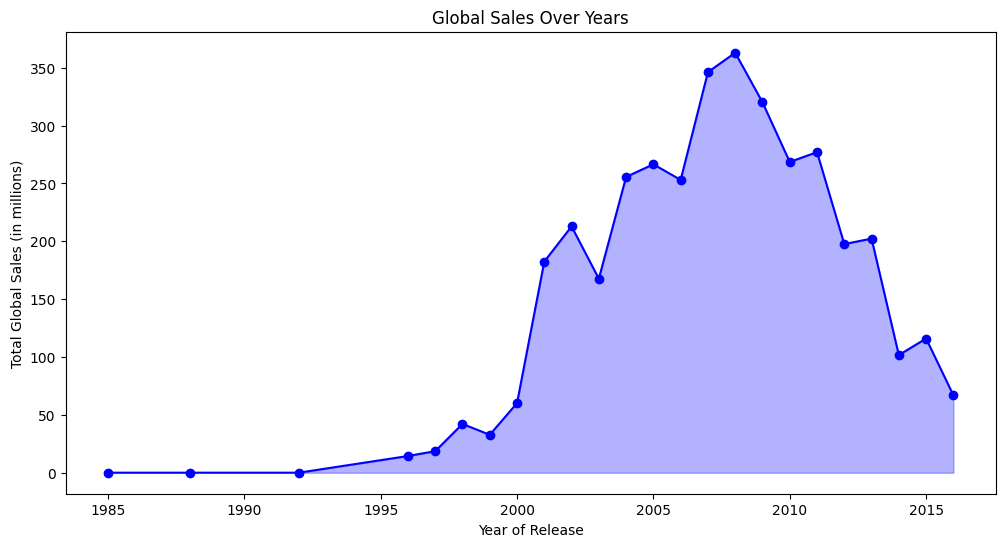

In [ ]:
#Impact of Release Year on Sales Performance
yearly_sales = df_train.groupby('year_of_release')['global_sales'].sum()
colors = "blue"
plt.figure(figsize=(12,6))
yearly_sales.plot(kind='line', marker='o', color = colors)
plt.fill_between(yearly_sales.index, yearly_sales, color=colors, alpha=0.3)
plt.title('Global Sales Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(False)
plt.show()

**Inference:**

The graph provided represents the global sales of video games from 1990 to 2015. The x-axis denotes the year of release, while the y-axis signifies the total global sales in millions. From 1990 to 2008, there’s a steady increase in sales, indicating a prosperous period for the video game industry. The peak of this growth was observed in 2008, with sales reaching approximately 350 million. However, post-2008, the graph shows a sharp decline in sales, ending at around 100 million in 2015. This suggests that the video game industry, after experiencing a boom in the early 2000s, has seen a downturn in recent years.The graph provides a comprehensive view of the video game industry’s sales trends over a span of 25 years, highlighting its rise and subsequent fall.

Also, we can generate a hypothesis based on this analysis that:

**Whether the year of release affect the global sales of video games?**

The hypothesis testing will be performed using "df_test" data to avoid double dipping

### **Relationship Between Genre and Video Game Sales**

By presenting sales figures per genre, it helps the developers in tailoring games to popular genres.

It offers a clear view of each genre's commercial success, aiding in strategic decision-making.

Developers can focus on genres that resonate with market preferences, potentially enhancing a game's sales. Publishers benefit from insights into genre diversity, optimizing their portfolios for broader market appeal.


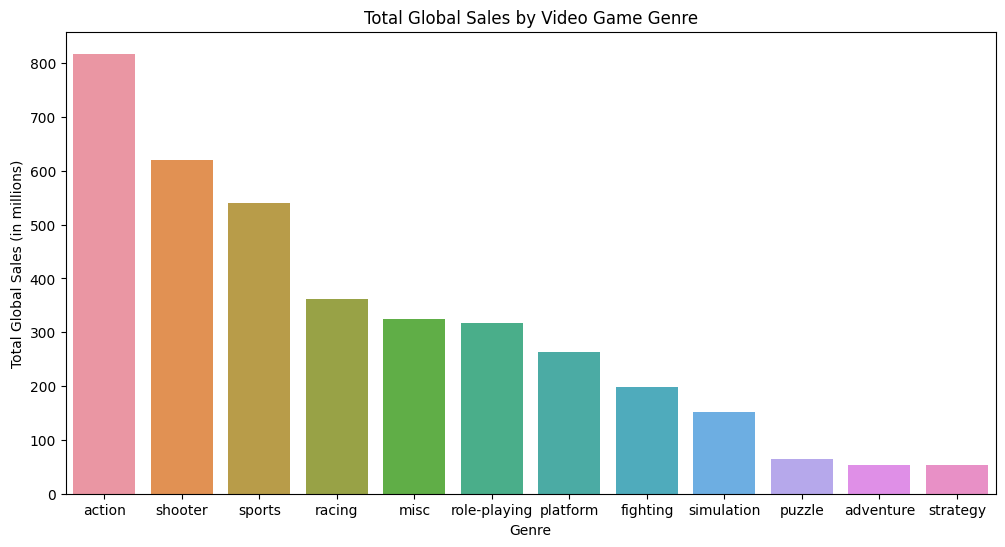

In [ ]:
#Relationship Between Genre and Video Game Sales
genre_sales = df_train.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_sales_plot = sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Video Game Genre')
plt.xlabel('Genre'),plt.ylabel('Total Global Sales (in millions)')
plt.grid(False)
plt.show()

**Inference:**

The graph represents the total global sales of video games, categorized by genre. The x-axis lists the genres, which include action, sports, shooter, role-playing, misc, platform, fighting, simulation, adventure, puzzle, and strategy. The y-axis denotes the total global sales in millions.The action genre leads the chart with the highest sales, indicating its popularity among gamers.. Following closely are the sports and shooter genres, which also show substantial sales figures. These three genres seem to dominate the global video game market.On the other end of the spectrum, the puzzle and strategy genres exhibit the lowest sales. This could suggest that these genres, while they have their dedicated player base, are not as universally popular.

Also, we can generate a hypothesis based on this analysis that:

**Whether the genre of a video game have a significant impact on global sales?**

### **Influence of Publisher on Sales Success**

This plot aids in making informed business decisions, understanding market dynamics, and forming strategic partnerships.

Developers seeking publishers and publishers optimizing their portfolios can leverage this information to identify influential players in the industry, potentially leading to more successful collaborations

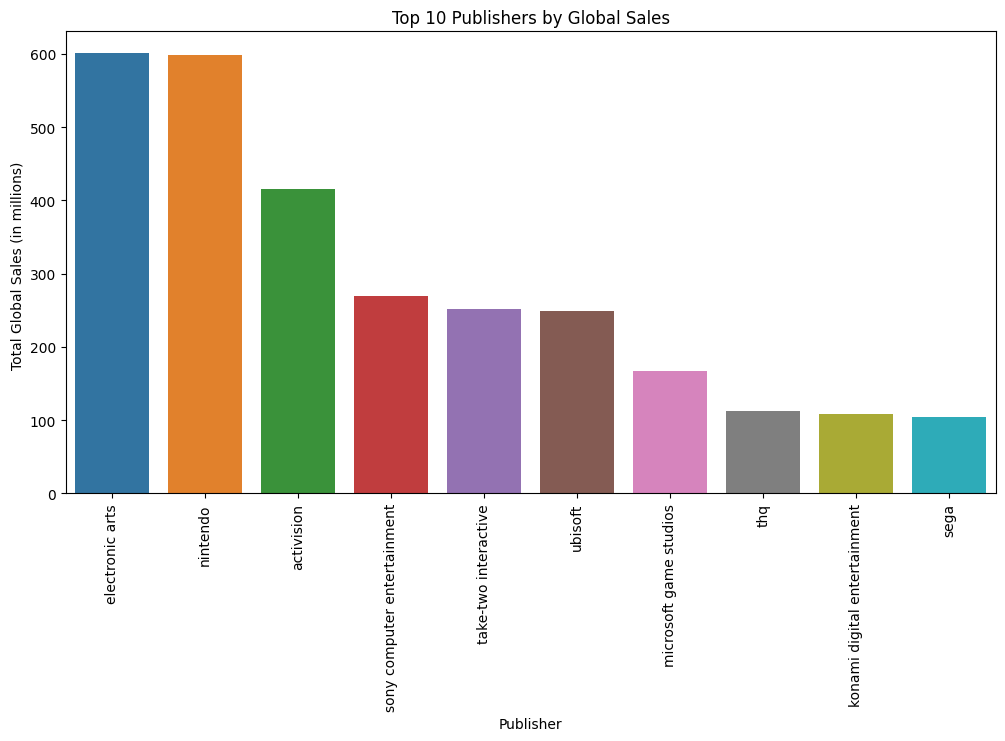

In [ ]:
#Influence of Publisher on Sales Success
top_publishers = df_train.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
to_publishers_plot = sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions) ')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()


**Inference:**

The graph represents the total global sales of video games, broken down by publisher. The x-axis lists the publishers, and the y-axis denotes the total sales in millions.Electronic Arts leads the chart with the highest sales, indicating its strong presence in the global video game market. Following closely are Nintendo and Activision, which also show substantial sales figures. Sega and Konami digital Entertainment exhibit the lowest sales among the top 10. While they are among the top publishers, their sales figures are noticeably lower than the top three.It’s a useful tool for understanding the competitive landscape of the video game industry.

Also, we can generate a hypothesis based on this analysis that:

**Whether the choice of publisher does not affect the global sales of a video game?**


### **Regional Sales Patterns**

This plot reveals regional sales trends, providing valuable insights for marketing strategies and localization efforts. Understanding how sales vary across different regions is essential for global market penetration.

Developers can tailor game features and marketing campaigns to specific regional preferences, enhancing the game's appeal in diverse markets.

The plot aids in grasping the nuances of global sales distribution and optimizing strategies for different regions.


**Top selling games at region level**

In [ ]:
df_na = pd.DataFrame(df_train.groupby("name")[["na_sales"]].mean().sort_values(by=['na_sales'],ascending=[False]).reset_index())
df_na.rename(columns = {'name':'name_na'}, inplace = True)

df_eu = pd.DataFrame(df_train.groupby("name")[["eu_sales"]].mean().sort_values(by=['eu_sales'],ascending=[False]).reset_index())
df_eu.rename(columns = {'name':'name_eu'}, inplace = True)

df_jp = pd.DataFrame(df_train.groupby("name")[["jp_sales"]].mean().sort_values(by=['jp_sales'],ascending=[False]).reset_index())
df_jp.rename(columns = {'name':'name_jp'}, inplace = True)

df_other = pd.DataFrame(df_train.groupby("name")[["other_sales"]].mean().sort_values(by=['other_sales'],ascending=[False]).reset_index())
df_other.rename(columns = {'name':'name_other'}, inplace = True)

#Concatenating the above dataframes
df_region=pd.concat([df_na,df_eu,df_jp,df_other],axis=1)

subplot_name1 = make_subplots(rows=4, cols=1, shared_yaxes=True,subplot_titles=("North American top games","Europe top games", "Japan top games","Other regions top games",'Top games globally'), y_title= 'Average Sales (in Million)', x_title ='Games')

#Subplot for North America
subplot_name1.add_trace(go.Bar(x=df_region['name_na'][:5], y=df_region['na_sales'][:5]),1, 1)

#Subplot for Europe
subplot_name1.add_trace(go.Bar(x=df_region['name_eu'][:5], y=df_region['eu_sales'][:5]), 2, 1)

#Subplot for Japan
subplot_name1.add_trace(go.Bar(x=df_region['name_jp'][:5], y=df_region['jp_sales'][:5]),3, 1)

#Subplot for other regions
subplot_name1.add_trace(go.Bar(x=df_region['name_other'][:5], y=df_region['other_sales'][:5]),4, 1)

subplot_name1.update_layout(height=1700,width=600,coloraxis=dict(colorscale='Mint_r'), showlegend=False)

subplot_name1.update_xaxes(tickangle=35)
subplot_name1.show()

The graph shows us the top games preferred by users in different regions and also globally based on the average global sales.

**Insights:**

- Mario kart wii has been the top game in North America and Europe.

- Gran turismo 4 is the top game in Other parts of the world.

- New super mario bros is the top game in Japan.

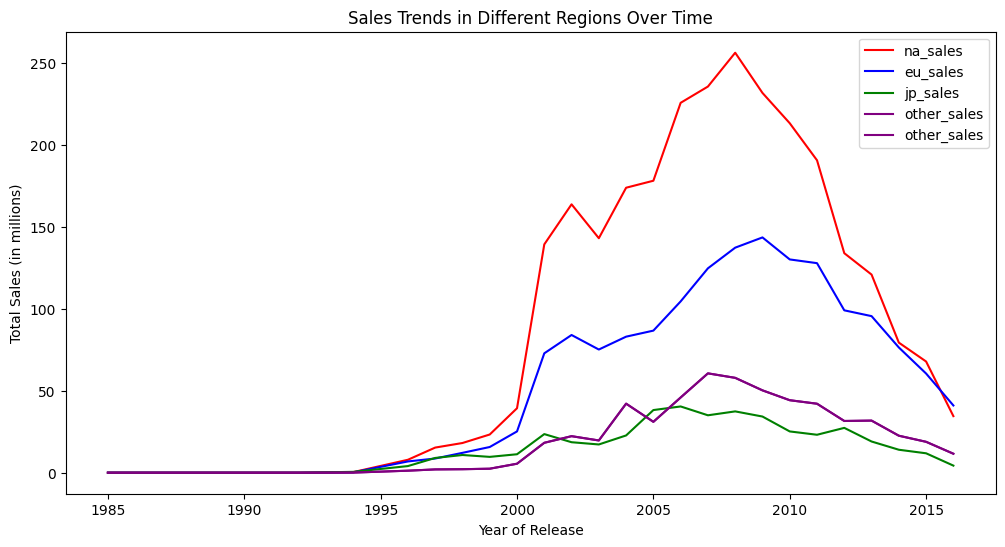

In [ ]:
regions = ['na_sales','eu_sales','jp_sales','other_sales','other_sales']

#Regional Sales Patterns
grouped_data = df.groupby('year_of_release')[regions].sum()
plt.figure(figsize=(12,6))
new_colors = ["red","blue","green","purple"]
for region, color in zip(regions, new_colors):
    plt.plot(grouped_data.index, grouped_data[region], label=region, color=color)

plt.title('Sales Trends in Different Regions Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

**Inference:**

The graph represents the sales trends of video games in different regions over time. The x-axis denotes the year of release, and the y-axis represents the total sales in millions. The graph includes four lines, each representing a different region: North America (na_sales), Japan (jp_sales), Europe (eu_sales), and other regions (other_sales). North America has consistently led in sales, with a notable peak around 2005. This suggests a high demand for video games in this region during that period. Japan and Europe have exhibited similar sales trends over the years. Japan had slightly higher sales in the early years, while Europe surpassed Japan in the later years. This could indicate shifting market dynamics and consumer preferences in these regions. Sales in other regions have consistently been the lowest.

### **User score distribution**

The histogram displaying the distribution of user scores offers developers a nuanced understanding of player satisfaction. Peaks and patterns in the histogram help identify commonly appreciated scores and potential areas for improvement.

This plot is a valuable tool for refining gameplay and addressing user concerns, ultimately contributing to an enhanced player experience and potentially improving a game's overall reception in the market.


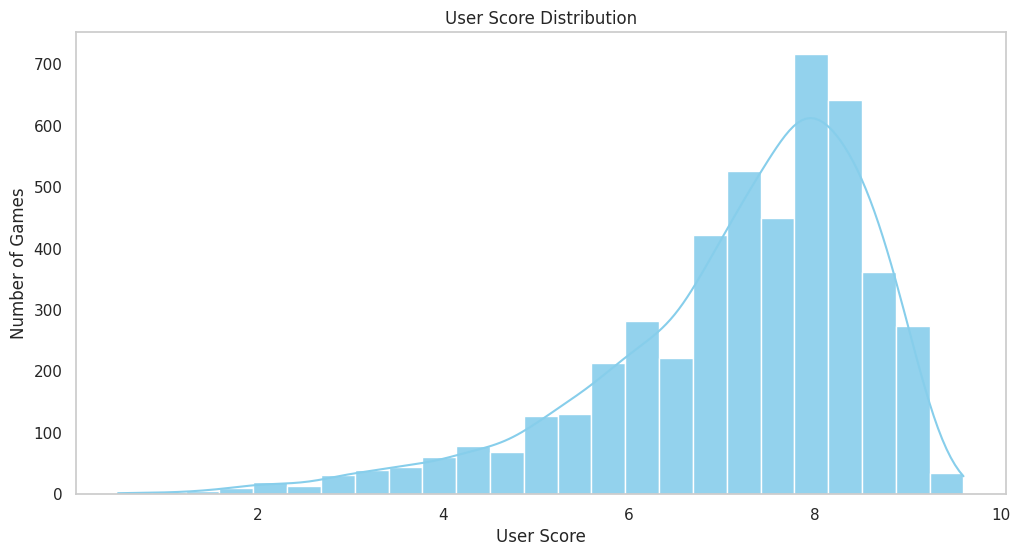

In [ ]:
#user_score distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df_train['user_score'], kde=True, bins=25, color = "skyblue" , alpha = 0.9)
plt.title('User Score Distribution')
plt.xlabel('User Score')
plt.ylabel('Number of Games')
plt.grid(False)
plt.show()


**Inference:**

The graph represents the distribution of user scores for a particular video game. The x-axis denotes the user score, which ranges from 0 to 10, and the y-axis represents the number of games with that score. The graph exhibits a bell curve shape, indicating a normal distribution of scores. The peak of the curve is around a score of 7, suggesting that the majority of users gave the game a positive rating. This indicates that the game was generally well-received.However, there is also a significant number of games with a score of 2 or lower. This shows that a subset of users were not satisfied with the game.

### **Global sales vs. Critic scores**

Scatter plot explores the correlation between critic scores and global sales. It provides a visual representation of how critical acclaim impacts commercial success.

Games with high critic scores and low sales, or vice versa, stand out. This plot aids stakeholders in assessing the influence of professional reviews on a game's market performance, offering insights into the dynamics between critical reception and commercial success.


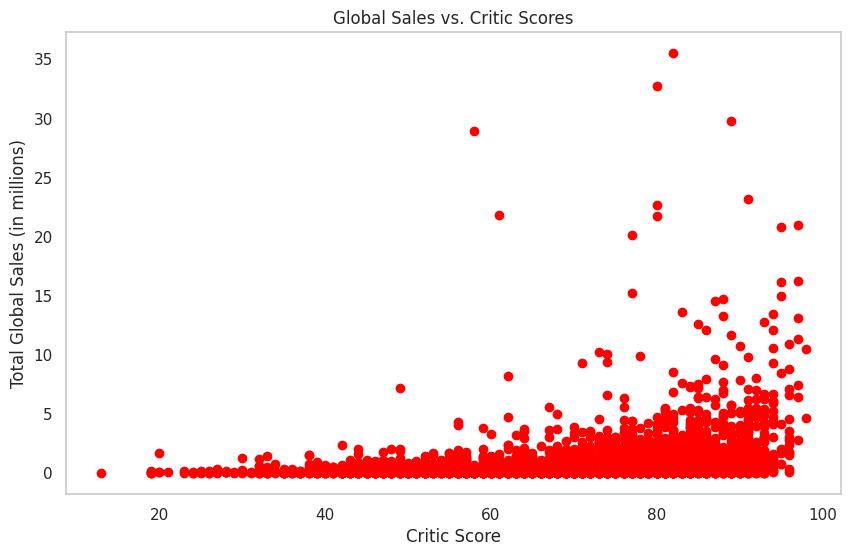

In [ ]:
#sales vs. critic_scores
top_games = df_train.sort_values('global_sales', ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(top_games['critic_score'],top_games['global_sales'], color = "red")
plt.title('Global Sales vs. Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(False)
plt.show()

**Inference:**

The graph is a scatter plot that illustrates the relationship between global sales and critic scores. The x-axis represents the critic score, while the y-axis represents the total global sales in millions. The data points, depicted in red, show a positive correlation between the two variables. This correlation suggests that as the critic score increases, the total global sales also increase. In other words, games that receive higher critic scores tend to generate higher global sales.

Also, we can generate a hypothesis based on this analysis that:

**Whether the critic scores significantly influences the global sales of video games?**





### **Average sales by rating**

The pie chart visually breaks down average sales for different game ratings. It serves as a concise overview of how different ratings contribute to the overall sales landscape.

Stakeholders can use this information to understand the market dynamics related to game ratings, guiding decisions on game development and marketing strategies.

The plot offers a snapshot of the distribution of games across various ratings, providing valuable insights into the market composition.

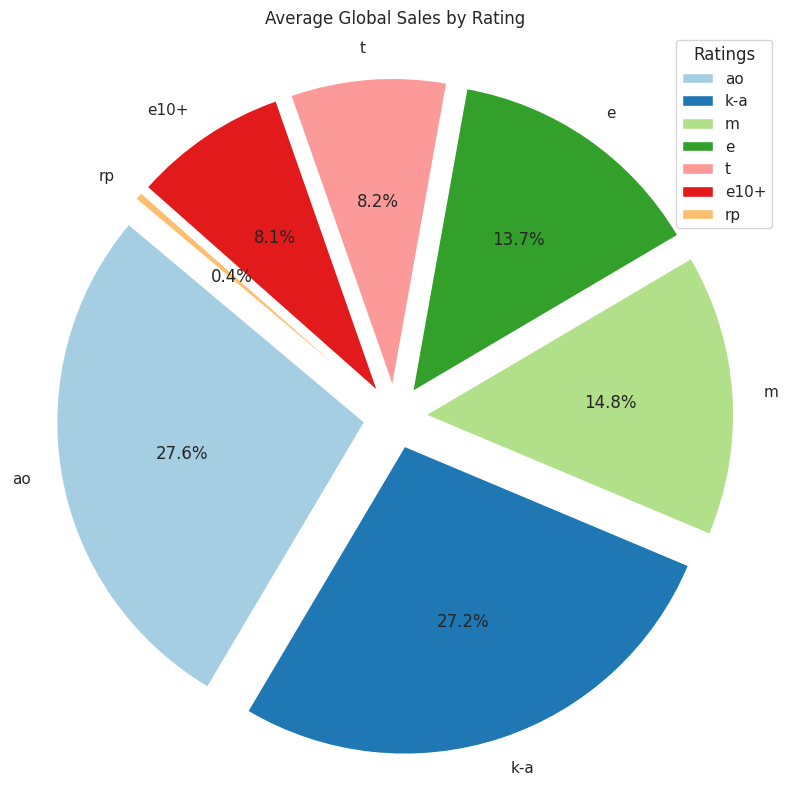

In [ ]:
#average sales by rating
average_sales_by_rating = df_train.groupby('rating')['global_sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
colors = plt.cm.Paired(range(len(average_sales_by_rating)))
average_sales_by_rating.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140, explode=[0.1]*len(average_sales_by_rating))
plt.title('Average Global Sales by Rating')
plt.ylabel('')
plt.legend(average_sales_by_rating.index, title='Ratings', bbox_to_anchor=(1, 1))
plt.show()





**Inference:**

The pie chart represents the average global sales by game rating. The ratings include “AO”, “E”, “KA”, “M”, “T”, and “E10+”. The largest percentage of sales is for “AO” rated games, accounting for 28.0% of the total. This is closely followed by “M” rated games, which make up 27.6% of sales. “E10+” rated games represent 14.4% of sales, while “T” rated games account for 13.3%. “E” and “KA” rated games have the smallest share of sales, at 8.5% and 8.3% respectively. This data suggests that “AO” and “M” rated games are the most popular globally, while “KA” and “E” rated games are the least popular


### **Distribution of Critic Scores by Genre**

The box plot provides a detailed view of the distribution of critic scores within different genres.

It aids developers and publishers in understanding the critical reception of games across diverse genres. By highlighting the spread and central tendency of critic scores, this plot offers insights into the variability in critical acclaim within each genre.

Stakeholders can use this information to make informed decisions about future game development, considering the critical preferences associated with specific genres.

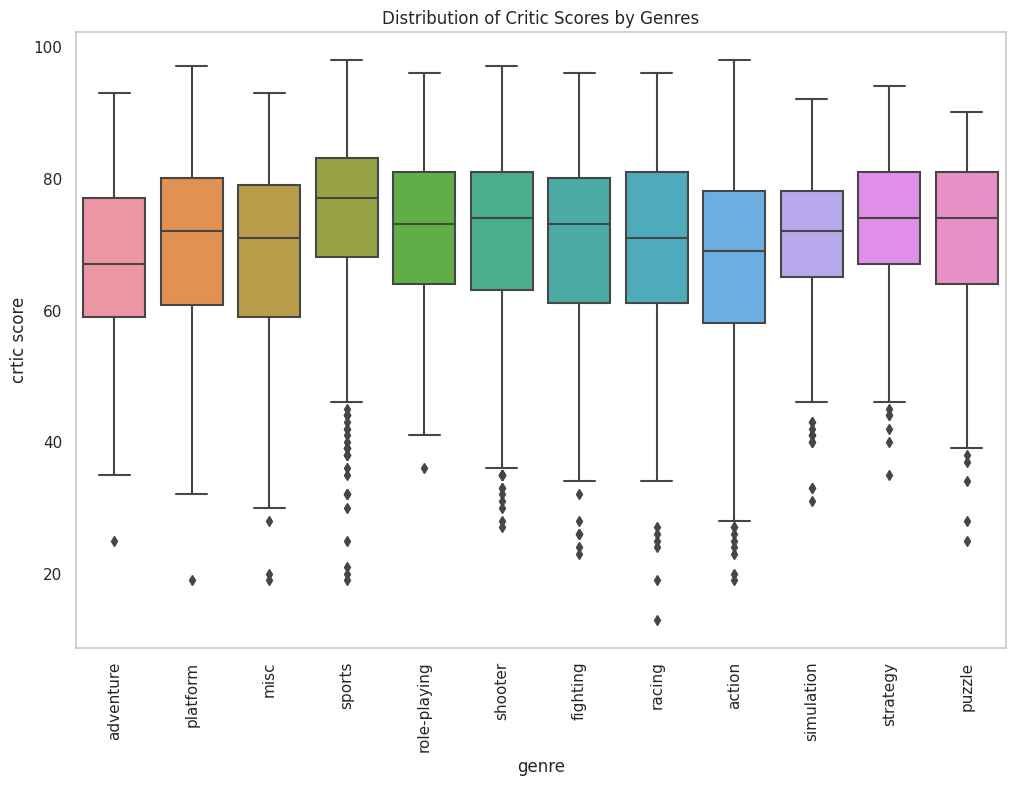

In [ ]:
#Distribution of Critic Scores by Genre
genres = df_train['genre'].value_counts().index
filtered_data = df_train[df_train['genre'].isin(genres)]
plt.figure(figsize=(12, 8))
sns.boxplot(y='critic_score', x='genre', data=filtered_data)
plt.title('Distribution of Critic Scores by Genres')
plt.xlabel('genre')
plt.ylabel('crtic score')
plt.xticks(rotation = 90),plt.grid(False)
plt.show()

**Inference:**

The box plot represents the distribution of critic scores across different game genres. The genres include action, role-playing, platform, adventure, sports, music, puzzle, racing, simulation, and fighting. The median critic scores for each genre are represented by the horizontal line within each box. The boxes themselves represent the interquartile range, which is the range of scores that fall between the 25th and 75th percentiles. The whiskers represent the minimum and maximum scores, excluding outliers, which are represented by the black dots. Based on this graph, it appears that the role-playing, adventure, and simulation genres have higher median critic scores compared to the other genres. Conversely, the puzzle and racing genres have the lowest median critic scores. This data suggest that games within the role-playing, adventure, and simulation genres are generally better received by critics.

### **Platform Popularity**

The count plot revealing the number of games released on each gaming platform is a key indicator of platform popularity. It offers insights into which platforms have the most significant market presence.

Developers can leverage this information to optimize game development resources, prioritize platform compatibility, and align their strategies with the platforms that are most popular among players.

This plot serves as a valuable tool for strategic planning in platform-specific game development.


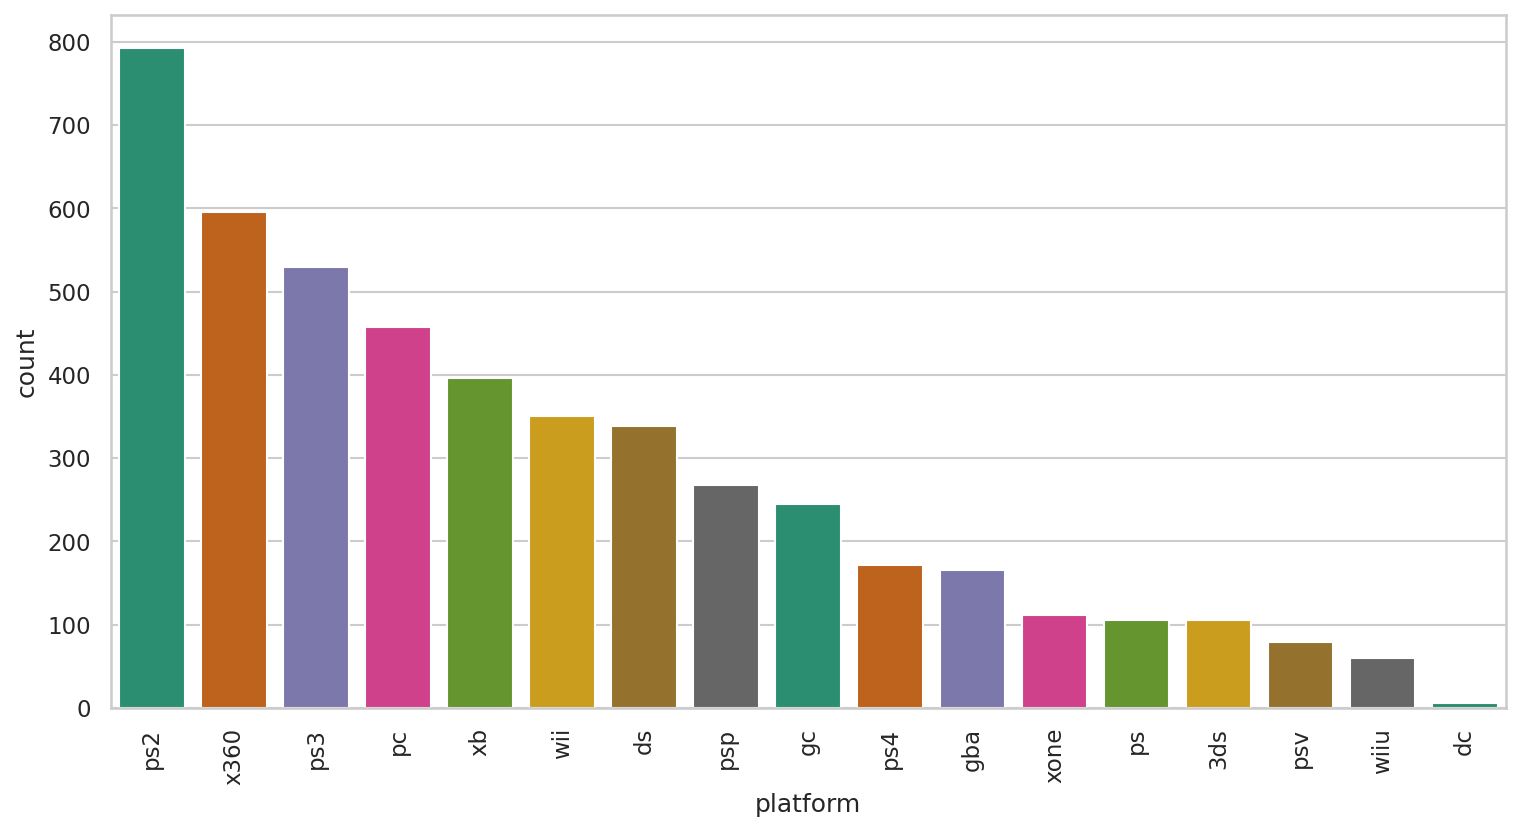

In [ ]:
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df_train,
              x="platform",
              order = df_train["platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

**Inference**

The bar chart represents the count of video game platforms. The x-axis represents the different platforms, while the y-axis represents the count. The platform with the highest count is the PS2, with a count of around 800. This suggests that the PS2 is the most popular platform among the ones represented in the graph. On the other hand, the DC platform has the lowest count, around 50, indicating that it is the least popular. The counts for the other platforms range from around 200 to 600. This graph provides a clear picture of the popularity of different video game platforms.

Also, we can generate a hypothesis based on this analysis that:

**Whether there is a significant difference in global sales between different gaming platforms?**

**Hypothesis Testing - Ideas**


Null Hypothesis (H0): There is no significant difference in global sales between different gaming platforms.

Alternative Hypothesis (H1): Global sales vary significantly among different gaming platforms.
Genre and Global Sales:

--------------------------------------------------------

H0: The genre of a video game does not have a significant impact on global sales.

H1: Global sales are influenced by the genre of the video game.
Critic Score and Global Sales:

---------------------------------------------------------

H0: There is no correlation between critic scores and global sales of video games.

H1: Critic scores have a significant correlation with global sales.
User Score and Global Sales:

--------------------------------------------------------

H0: The choice of publisher does not affect the global sales of a video game.

H1: Global sales are influenced by the choice of publisher.
Rating and Global Sales:



### **Hypothesis Testing - Implementation**

In [ ]:
from scipy.stats import f_oneway, pearsonr

#Performing hypothesis testing for each of the hypotheses
data = df_test.copy()

#Function to perform an ANOVA test
def anova_test(data, group_column, value_column):
    groups = data[group_column].unique()
    args = [data[value_column][data[group_column] == group] for group in groups]
    f_stat, p_value = f_oneway(*args)
    return f_stat, p_value

#Function to perform a correlation test
def correlation_test(data, column1, column2):
    correlation, p_value = pearsonr(data[column1], data[column2])
    return correlation, p_value

#Testing Hypothesis 1: Platform and Global Sales
# Null Hypothesis (H0): There is no significant difference in global sales between different gaming platforms.
# Alternative Hypothesis (H1): Global sales vary significantly among different gaming platforms.
platform_f_stat, platform_p_value = anova_test(data, 'platform', 'global_sales')

#Testing Hypothesis 2: Genre and Global Sales
# H0: The genre of a video game does not have a significant impact on global sales.
# H1: Global sales are influenced by the genre of the video game.
genre_f_stat, genre_p_value = anova_test(data, 'genre', 'global_sales')

#Testing Hypothesis 3: Critic Score and Global Sales
# H0: There is no correlation between critic scores and global sales of video games.
# H1: Critic scores have a significant correlation with global sales.
critic_corr, critic_p_value = correlation_test(data, 'critic_score', 'global_sales')

#Testing Hypothesis 4: Publisher and Global Sales
# H0: The choice of publisher does not affect the global sales of a video game.
# H1: Global sales are influenced by the choice of publisher.
publisher_f_stat, publisher_p_value = anova_test(data, 'publisher', 'global_sales')


#Results
print("Hypothesis 1: Platform and Global Sales")
print(f"F-statistic: {platform_f_stat} \n P-value: {platform_p_value}")
if platform_p_value <0.05:
  print("Global sales vary significantly among different gaming platforms\n")
else:
  print("There is no significant difference in global sales between different gaming platforms\n")

print("Hypothesis 2: Genre and Global Sales")
print(f"F-statistic: {genre_f_stat} \n P-value: {genre_p_value}")
if genre_p_value <0.05:
  print("Global sales are influenced by the genre of the video game\n")
else:
  print("The genre of a video game does not have a significant impact on global sales\n")

print("Hypothesis 3: Critic Score and Global Sales")
print(f"F-statistic: {critic_corr} \n P-value: {critic_p_value}")
if critic_p_value <0.05:
  print("Critic scores have a significant correlation with global sales\n")
else:
  print("There is no correlation between critic scores and global sales of video games\n")

print("Hypothesis 4: Publisher and Global Sales")
print(f"F-statistic: {publisher_f_stat} \n P-value: {publisher_p_value}")
if publisher_p_value <0.05:
  print("Global sales are influenced by the choice of publisher\n")
else:
  print("The choice of publisher does not affect the global sales of a video game\n")

# (platform_f_stat, platform_p_value), (genre_f_stat, genre_p_value), (critic_corr, critic_p_value), \
# (publisher_f_stat, publisher_p_value)

Hypothesis 1: Platform and Global Sales
F-statistic: 6.443066060383231 
 P-value: 2.3454638302137824e-14
Global sales vary significantly among different gaming platforms

Hypothesis 2: Genre and Global Sales
F-statistic: 2.8628128871208105 
 P-value: 0.0009801382468553048
Global sales are influenced by the genre of the video game

Hypothesis 3: Critic Score and Global Sales
F-statistic: 0.3268368453731964 
 P-value: 3.465601738331685e-52
Critic scores have a significant correlation with global sales

Hypothesis 4: Publisher and Global Sales
F-statistic: 1.764527458622544 
 P-value: 4.173433519816697e-08
Global sales are influenced by the choice of publisher





1. **Platform and Global Sales**:
   - F-statistic: 6.44, p-value: $2.34 \times 10^{-14}$
   - This indicates a very significant difference in global sales among different gaming platforms. The extremely small p-value strongly rejects the null hypothesis.

2. **Genre and Global Sales**:
   - F-statistic: 2.86, p-value: $0.00098$
   - This suggests that the genre of a video game has a significant impact on global sales, as the p-value is much lower than the typical alpha level of 0.05.

3. **Critic Score and Global Sales**:
   - Correlation: 0.326, p-value: $3.46 \times 10^{-52}$
   - There is a significant, albeit weak, positive correlation between critic scores and global sales of video games.

4. **Publisher and Global Sales**:
   - F-statistic: 1.76, p-value: $4.17 \times 10^{-8}$
   - The choice of publisher seems to have a significant impact on the global sales of a video game, as indicated by the low p-value.


